# Regras de Associação


In [605]:
import os

import pandas as pd
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [606]:
df = pd.read_csv("data/data.csv")
df

,idUsuario,artista,sexo,pais
0,5,dream theater,m,Finland
1,5,ac/dc,m,Finland
2,5,metallica,m,Finland
3,5,iron maiden,m,Finland
4,5,bob marley & the wailers,m,Finland
...,...,...,...,...
58450,19714,led zeppelin,m,United Kingdom
58451,19714,slipknot,m,United Kingdom
58452,19714,children of bodom,m,United Kingdom
58453,19714,vader,m,United Kingdom


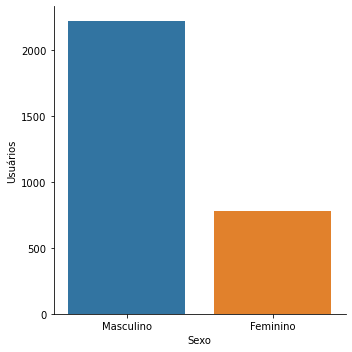

In [607]:
g = sns.catplot(data=df.groupby("idUsuario").first(), x="sexo", kind="count")
g.set_ylabels("Usuários")
g.set_xlabels("Sexo")
g.set_xticklabels(["Masculino", "Feminino"])

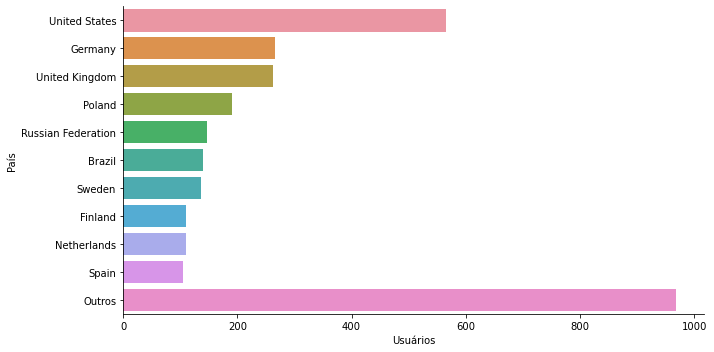

In [608]:
df_gp = df.groupby("idUsuario").first()

freq = list(df_gp["pais"].value_counts().index[:10])

df_in = df_gp[df_gp["pais"].isin(freq)]
df_out = df_gp[~df_gp["pais"].isin(freq)].copy()
df_out["pais"] = "Outros"

g = sns.catplot(
    data=pd.concat([df_in, df_out]),
    y="pais",
    kind="count",
    aspect=2,
    order=freq + ["Outros"],
    orient="h",
)
g.set_ylabels("País")
g.set_xlabels("Usuários")

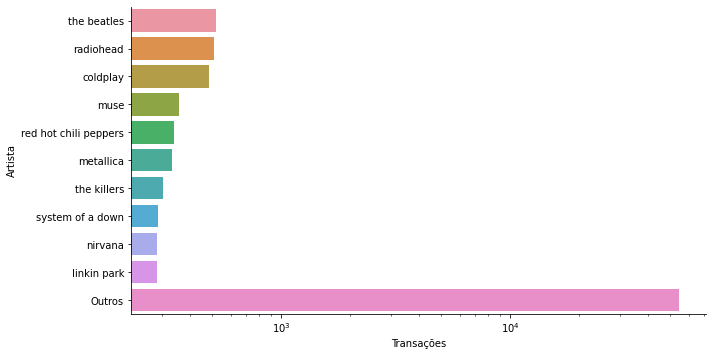

In [609]:
freq = list(df["artista"].value_counts().index[:10])

df_in = df[df["artista"].isin(freq)]
df_out = df[~df["artista"].isin(freq)].copy()
df_out["artista"] = "Outros"

g = sns.catplot(
    data=pd.concat([df_in, df_out]),
    y="artista",
    kind="count",
    aspect=2,
    order=freq + ["Outros"],
    orient="h",
)
g.set_ylabels("Artista")
g.set_xlabels("Transações")
g.ax.set_xscale("log")

### Regras de Associação (Geral)


In [610]:
transactions = df.groupby("idUsuario")["artista"].aggregate(list)
transactions

idUsuario
5        [dream theater, ac/dc, metallica, iron maiden,...
9        [arch enemy, strapping young lad, kreator, chi...
14       [sonic youth, the fall, mogwai, the velvet und...
22       [the jam, maxïmo park, supergrass, simon & gar...
24       [the byrds, leonard cohen, the beatles, simon ...
                               ...                        
19688    [bullet for my valentine, escape the fate, 30 ...
19701    [placebo, animal collective, crystal castles, ...
19703    [the offspring, pearl jam, the smashing pumpki...
19708    [coldplay, amy winehouse, armin van buuren, mo...
19714    [misfits, type o negative, arch enemy, red hot...
Name: artista, Length: 3000, dtype: object

In [611]:
encoder = TransactionEncoder()
df_t = pd.DataFrame(encoder.fit_transform(transactions), columns=encoder.columns_)
df_t

,...and you will know us by the trail of dead,2pac,3 doors down,30 seconds to mars,311,36 crazyfists,44,50 cent,65daysofstatic,[unknown],...,wilco,within temptation,wolfgang amadeus mozart,wu-tang clan,yann tiersen,yeah yeah yeahs,yellowcard,yo la tengo,zero 7,Édith piaf
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [612]:
min_support = 0.01
file_path = f"data/itemsets_{min_support}.csv"

if not os.path.isfile(file_path):
    itemsets = apriori(df_t, min_support=min_support, use_colnames=True)
    itemsets.to_csv(file_path, index=False)
else:
    itemsets = pd.read_csv(file_path, converters={"itemsets": eval})

itemsets["itemsets"]

0        (...and you will know us by the trail of dead)
1                                                (2pac)
2                                        (3 doors down)
3                                  (30 seconds to mars)
4                                                 (311)
                             ...                       
1811                (the beatles, sigur rós, radiohead)
1812                 (the beatles, radiohead, the cure)
1813    (the beatles, the smashing pumpkins, radiohead)
1814        (the white stripes, the beatles, radiohead)
1815       (the smashing pumpkins, radiohead, the cure)
Name: itemsets, Length: 1816, dtype: object

In [613]:
itemsets["itemsets"].apply(len).describe()

count    1816.000000
mean        1.673458
std         0.558116
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: itemsets, dtype: float64

In [614]:
# Tecnicamente, regras com confiança maior que 0.5 já seriam relevantes.
rules_gen = association_rules(
    itemsets, metric="confidence", min_threshold=0.6
).sort_values(by="lift", ascending=False)
rules_gen["absolute_support"] = (rules_gen["support"] * len(transactions)).apply(round)
rules_gen

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,absolute_support
0,(beyoncé),(rihanna),0.024667,0.045333,0.015333,0.621622,13.712242,0.014215,2.523048,46
3,(the pussycat dolls),(rihanna),0.017667,0.045333,0.010667,0.603774,13.318535,0.009866,2.409397,32
16,"(slipknot, koЯn)",(system of a down),0.017000,0.096000,0.012000,0.705882,7.352941,0.010368,3.073600,36
15,"(rammstein, koЯn)",(system of a down),0.015333,0.096000,0.010333,0.673913,7.019928,0.008861,2.772267,31
14,"(metallica, koЯn)",(system of a down),0.017667,0.096000,0.011667,0.660377,6.878931,0.009971,2.661778,35
12,"(iron maiden, megadeth)",(metallica),0.015667,0.111000,0.010333,0.659574,5.942112,0.008594,2.611438,31
13,"(iron maiden, nightwish)",(metallica),0.017000,0.111000,0.010333,0.607843,5.476064,0.008446,2.266950,31
5,"(beck, death cab for cutie)",(radiohead),0.013667,0.169667,0.010667,0.780488,4.600125,0.008348,3.782630,32
8,"(keane, the killers)",(coldplay),0.017000,0.160667,0.012000,0.705882,4.393459,0.009269,2.853733,36
11,"(coldplay, the smashing pumpkins)",(radiohead),0.018667,0.169667,0.013333,0.714286,4.209935,0.010166,2.906167,40


In [615]:
rules_gen.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,absolute_support
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.018667,0.138633,0.012217,0.659556,5.577117,0.009630,2.579251,36.650000
std,0.005430,0.043011,0.003205,0.047107,2.966251,0.002488,0.398209,9.615092
min,0.013667,0.045333,0.010000,0.603774,3.582573,0.007449,2.117350,30.000000
25%,0.015917,0.107250,0.010333,0.618182,3.916905,0.008242,2.265300,31.000000
50%,0.017000,0.160667,0.011167,0.659976,4.185171,0.008728,2.534702,33.500000
75%,0.018333,0.169667,0.012000,0.692096,6.176317,0.010020,2.784983,36.000000
max,0.036333,0.172000,0.023000,0.780488,13.712242,0.017162,3.782630,69.000000


### Regras de Associação (Sexo Masculino)


In [616]:
transactions = df[df["sexo"] == "m"].groupby("idUsuario")["artista"].aggregate(list)

In [617]:
encoder = TransactionEncoder()
df_t = pd.DataFrame(encoder.fit_transform(transactions), columns=encoder.columns_)

In [618]:
min_support = 0.01
file_path = f"data/itemsets_sexo_{min_support}.csv"

if not os.path.isfile(file_path):
    itemsets = apriori(df_t, min_support=min_support, use_colnames=True)
    itemsets.to_csv(file_path, index=False)
else:
    itemsets = pd.read_csv(file_path, converters={"itemsets": eval})

In [619]:
itemsets["itemsets"].apply(len).describe()

count    1622.000000
mean        1.638718
std         0.552203
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: itemsets, dtype: float64

In [620]:
rules_male = association_rules(
    itemsets, metric="confidence", min_threshold=0.6
).sort_values(by="lift", ascending=False)
rules_male["absolute_support"] = (rules_male["support"] * len(transactions)).apply(
    round
)
rules_male

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,absolute_support
3,(kreator),(slayer),0.015773,0.043713,0.010365,0.657143,15.032990,0.009676,2.789169,23
17,"(slipknot, linkin park)",(koЯn),0.016224,0.054078,0.011266,0.694444,12.841435,0.010389,3.095743,25
9,"(slipknot, disturbed)",(koЯn),0.017125,0.054078,0.010816,0.631579,11.678947,0.009890,2.567501,24
18,"(linkin park, koЯn)",(slipknot),0.017575,0.055430,0.011266,0.641026,11.564519,0.010292,2.631301,25
22,"(system of a down, slipknot)",(koЯn),0.023434,0.054078,0.014421,0.615385,11.379487,0.013154,2.459396,32
2,(the game),(kanye west),0.016674,0.062190,0.010365,0.621622,9.995495,0.009328,2.478497,23
6,"(judas priest, ac/dc)",(iron maiden),0.017575,0.072555,0.011717,0.666667,9.188406,0.010442,2.782334,26
10,"(metallica, judas priest)",(iron maiden),0.017575,0.072555,0.011717,0.666667,9.188406,0.010442,2.782334,26
5,"(iron maiden, judas priest)",(ac/dc),0.018927,0.067598,0.011717,0.619048,9.157778,0.010438,2.447555,26
1,(kaiser chiefs),(the killers),0.022983,0.087427,0.013970,0.607843,6.952598,0.011961,2.327062,31


In [621]:
rules_male.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,absolute_support
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.018513,0.098837,0.012005,0.649633,7.521384,0.010167,2.598839,26.640000
std,0.003073,0.033944,0.001977,0.035605,3.052325,0.001644,0.291980,4.386342
min,0.015322,0.043713,0.010365,0.605263,4.292402,0.008173,2.209103,23.000000
25%,0.016674,0.067598,0.010816,0.619048,4.991882,0.009295,2.414809,24.000000
50%,0.017575,0.101848,0.011717,0.638889,6.267181,0.009927,2.532468,26.000000
75%,0.018927,0.127986,0.012168,0.666667,9.188406,0.010442,2.750199,27.000000
max,0.029292,0.161785,0.019378,0.750000,15.032990,0.015193,3.488058,43.000000


### Regras de Associação (Estados Unidos)


In [622]:
transactions = (
    df[df["pais"] == "United States"].groupby("idUsuario")["artista"].aggregate(list)
)

In [623]:
encoder = TransactionEncoder()
df_t = pd.DataFrame(encoder.fit_transform(transactions), columns=encoder.columns_)

In [624]:
min_support = 0.02
file_path = f"data/itemsets_pais_{min_support}.csv"

if not os.path.isfile(file_path):
    itemsets = apriori(df_t, min_support=min_support, use_colnames=True)
    itemsets.to_csv(file_path, index=False)
else:
    itemsets = pd.read_csv(file_path, converters={"itemsets": eval})

In [625]:
itemsets["itemsets"].apply(len).describe()

count    812.000000
mean       1.694581
std        0.660919
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: itemsets, dtype: float64

In [626]:
rules_us = association_rules(
    itemsets, metric="confidence", min_threshold=0.7
).sort_values(by="lift", ascending=False)
rules_us["absolute_support"] = (rules_us["support"] * len(transactions)).apply(round)
rules_us

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,absolute_support
33,(wilco),"(the beatles, radiohead)",0.030035,0.104240,0.021201,0.705882,6.771685,0.018071,3.045583,12
39,"(the beatles, radiohead, the shins)",(beck),0.031802,0.134276,0.022968,0.722222,5.378655,0.018698,3.116608,13
35,"(modest mouse, death cab for cutie, radiohead)",(beck),0.030035,0.134276,0.021201,0.705882,5.256966,0.017168,2.943463,12
22,"(the beatles, rilo kiley)",(death cab for cutie),0.028269,0.181979,0.022968,0.812500,4.464806,0.017824,4.362780,13
4,"(andrew bird, radiohead)",(death cab for cutie),0.026502,0.181979,0.021201,0.800000,4.396117,0.016379,4.090106,12
34,"(modest mouse, beck, death cab for cutie)",(radiohead),0.021201,0.233216,0.021201,1.000000,4.287879,0.016257,inf,12
36,"(the beatles, beck, death cab for cutie)",(radiohead),0.021201,0.233216,0.021201,1.000000,4.287879,0.016257,inf,12
20,"(feist, radiohead)",(death cab for cutie),0.028269,0.181979,0.021201,0.750000,4.121359,0.016057,3.272085,12
9,"(sigur rós, beck)",(radiohead),0.026502,0.233216,0.024735,0.933333,4.002020,0.018554,11.501767,14
25,"(sigur rós, elliott smith)",(radiohead),0.024735,0.233216,0.022968,0.928571,3.981602,0.017200,10.734982,13


In [627]:
rules_us.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,absolute_support
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.031676,0.224760,0.024903,0.794994,3.640426,0.017767,inf,14.095238
std,0.009138,0.034905,0.006666,0.085749,0.782585,0.004615,NaN,3.772878
min,0.021201,0.104240,0.021201,0.705882,2.689327,0.014197,2.607067,12.000000
25%,0.026943,0.233216,0.021201,0.725877,3.180087,0.015153,2.946996,12.000000
50%,0.030035,0.233216,0.022968,0.764706,3.317005,0.016377,3.258834,13.000000
75%,0.031802,0.233216,0.024735,0.848739,3.981602,0.018124,4.930801,14.000000
max,0.072438,0.268551,0.056537,1.000000,6.771685,0.039643,inf,32.000000


## Regras de Associação (Mistura)


In [628]:
# Misturar artistas e características dos usuários
df_info = df.groupby("idUsuario").first()
df_info["idUsuario"] = df_info.index

df_gender = df_info[["idUsuario", "sexo"]].rename(columns={"sexo": "item"})
df_country = df_info[["idUsuario", "pais"]].rename(columns={"pais": "item"})

df_mix = df[["idUsuario", "artista"]].rename(columns={"artista": "item"})
df_mix = pd.concat([df_mix, df_gender, df_country], ignore_index=True)
df_mix

,idUsuario,item
0,5,dream theater
1,5,ac/dc
2,5,metallica
3,5,iron maiden
4,5,bob marley & the wailers
...,...,...
64450,19688,Italy
64451,19701,United States
64452,19703,Poland
64453,19708,Brazil


In [629]:
transactions = df_mix.groupby("idUsuario")["item"].aggregate(list)

In [630]:
encoder = TransactionEncoder()
df_t = pd.DataFrame(encoder.fit_transform(transactions), columns=encoder.columns_)

In [631]:
min_support = 0.01
file_path = f"data/itemsets_mix_{min_support}.csv"

if not os.path.isfile(file_path):
    itemsets = apriori(df_t, min_support=min_support, use_colnames=True)
    itemsets.to_csv(file_path, index=False)
else:
    itemsets = pd.read_csv(file_path, converters={"itemsets": eval})

In [632]:
itemsets["itemsets"].apply(len).describe()

count    3122.000000
mean        1.972133
std         0.649988
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: itemsets, dtype: float64

In [633]:
rules_mix = association_rules(
    itemsets, metric="confidence", min_threshold=0.6
).sort_values(by="lift", ascending=False)
rules_mix["absolute_support"] = (rules_mix["support"] * len(transactions)).apply(round)

# Remover 'não-artistas' dos consequentes.
blacklist = list(df["sexo"].unique()) + list(df["pais"].unique())
mask = rules_mix["consequents"].apply(lambda x: any(b in x for b in blacklist))
rules_mix = rules_mix[~mask]
rules_mix

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,absolute_support
76,(beyoncé),(rihanna),0.024667,0.045333,0.015333,0.621622,13.712242,0.014215,2.523048,46
889,"(system of a down, m, slipknot)",(koЯn),0.017333,0.046000,0.010667,0.615385,13.377926,0.009869,2.480400,32
440,(the pussycat dolls),(rihanna),0.017667,0.045333,0.010667,0.603774,13.318535,0.009866,2.409397,32
707,"(slipknot, koЯn)",(system of a down),0.017000,0.096000,0.012000,0.705882,7.352941,0.010368,3.073600,36
891,"(m, slipknot, koЯn)",(system of a down),0.015333,0.096000,0.010667,0.695652,7.246377,0.009195,2.970286,32
706,"(rammstein, koЯn)",(system of a down),0.015333,0.096000,0.010333,0.673913,7.019928,0.008861,2.772267,31
705,"(metallica, koЯn)",(system of a down),0.017667,0.096000,0.011667,0.660377,6.878931,0.009971,2.661778,35
887,"(metallica, m, koЯn)",(system of a down),0.015667,0.096000,0.010000,0.638298,6.648936,0.008496,2.499294,30
690,"(m, kaiser chiefs)",(the killers),0.017000,0.101667,0.010333,0.607843,5.978785,0.008605,2.290750,31
676,"(iron maiden, megadeth)",(metallica),0.015667,0.111000,0.010333,0.659574,5.942112,0.008594,2.611438,31


In [634]:
rules_mix.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,absolute_support
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.018402,0.136345,0.012046,0.660013,5.687920,0.009522,2.595819,36.137931
std,0.004901,0.043535,0.002845,0.049108,2.953856,0.002136,0.422863,8.534485
min,0.013667,0.045333,0.010000,0.603774,3.567366,0.007449,2.103511,30.000000
25%,0.015667,0.096000,0.010333,0.618182,3.940005,0.008348,2.287183,31.000000
50%,0.017000,0.160667,0.010667,0.659574,4.209935,0.008861,2.518000,32.000000
75%,0.018333,0.169667,0.012000,0.695652,6.648936,0.009971,2.772267,36.000000
max,0.036333,0.172000,0.023000,0.780488,13.712242,0.017162,3.782630,69.000000
